In [1]:
#Import
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn
from torchmetrics import Accuracy  # alternative to sklearn matrices
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



In [2]:
#hyperparameters for dataset
NUM_CLASSES = 6
NUM_FEATURES = 3
RANDOM_SEED = 42

In [3]:
#Creating Multi-class data

X_blob, y_blob = make_blobs(n_samples=5000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std= 1.5,
                             random_state=RANDOM_SEED)

In [4]:
#data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

In [5]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X_blob,
                                                 y_blob,
                                                 test_size = 0.2,
                                                 random_state=RANDOM_SEED
                                                 )

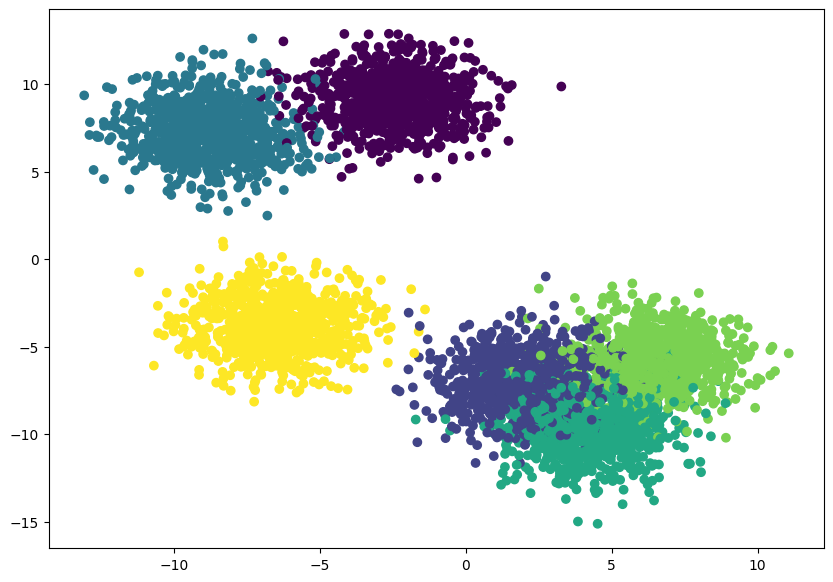

In [6]:
#plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob)

In [7]:
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
#model development
class multiclass_classification_ANN(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

In [9]:
#instance of the model class
model = multiclass_classification_ANN(input_features = NUM_FEATURES,
                                      output_features = NUM_CLASSES,
                                      hidden_units=16).to(device)

model

multiclass_classification_ANN(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=3, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=6, bias=True)
  )
)

In [10]:
#Loss function
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.02)

In [11]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_test.to(device))

y_logits[:10]

tensor([[ 1.0855e-03, -2.6837e-03,  2.1617e-02,  2.5584e-01,  1.2710e-01,
         -1.2223e-01],
        [-6.1965e-01,  1.8151e-01, -9.4750e-01,  7.9865e-01,  5.0144e-01,
         -5.6810e-01],
        [-6.5899e-01,  1.1085e-01, -8.5124e-01,  1.0909e+00,  5.1248e-01,
         -5.6266e-01],
        [-6.4529e-01,  1.6177e-01, -9.8737e-01,  8.4745e-01,  5.3491e-01,
         -6.0849e-01],
        [-4.5803e-01,  5.0052e-01, -6.1600e-01,  6.1137e-01,  7.5894e-02,
         -2.2930e-01],
        [-1.8679e-01,  2.0681e-01,  5.3567e-03,  2.4448e-01,  1.7884e-01,
         -5.4022e-02],
        [-5.8350e-01,  2.9021e-02, -6.2052e-01,  1.0762e+00,  4.4948e-01,
         -4.3070e-01],
        [-5.6271e-01, -4.4153e-02, -1.0068e+00,  8.8603e-01,  5.0809e-01,
         -6.2362e-02],
        [-2.3206e-01,  2.9529e-01, -2.5318e-01,  4.5510e-01,  1.2799e-01,
         -1.1128e-01],
        [-5.8804e-01,  1.3689e-01, -8.2965e-01,  7.8875e-01,  4.4118e-01,
         -5.3019e-01]], device='cuda:0')

In [12]:
y_test[:10]

tensor([2, 1, 1, 1, 3, 0, 1, 4, 3, 1])

In [13]:
#activation layer for predicting and converting raw logits to model predictions probas%
y_pred_probs = torch.softmax(y_logits, dim=1)
y_logits[:5], y_pred_probs[:5]

(tensor([[ 1.0855e-03, -2.6837e-03,  2.1617e-02,  2.5584e-01,  1.2710e-01,
          -1.2223e-01],
         [-6.1965e-01,  1.8151e-01, -9.4750e-01,  7.9865e-01,  5.0144e-01,
          -5.6810e-01],
         [-6.5899e-01,  1.1085e-01, -8.5124e-01,  1.0909e+00,  5.1248e-01,
          -5.6266e-01],
         [-6.4529e-01,  1.6177e-01, -9.8737e-01,  8.4745e-01,  5.3491e-01,
          -6.0849e-01],
         [-4.5803e-01,  5.0052e-01, -6.1600e-01,  6.1137e-01,  7.5894e-02,
          -2.2930e-01]], device='cuda:0'),
 tensor([[0.1581, 0.1575, 0.1614, 0.2040, 0.1793, 0.1398],
         [0.0820, 0.1826, 0.0591, 0.3385, 0.2515, 0.0863],
         [0.0711, 0.1535, 0.0587, 0.4091, 0.2294, 0.0783],
         [0.0788, 0.1766, 0.0560, 0.3505, 0.2564, 0.0817],
         [0.0967, 0.2523, 0.0826, 0.2818, 0.1650, 0.1216]], device='cuda:0'))

In [14]:
#results before training
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')

In [15]:
#torchmatric accuracy works good with torch and agnostic cote
torchmetric_accuracy = Accuracy(task="Multiclass", num_classes=NUM_CLASSES).to(device)

In [16]:
#training and trsting loop
torch.manual_seed(42)
#epochs
epochs = 200

#data to target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Loop

for epoch in range(epochs):

  model.train()

  y_logits = model(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)


  loss = loss_fn(y_logits, y_train)
  acc = torchmetric_accuracy(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  ##testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = torchmetric_accuracy(y_test,test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.3f}, |Acc: {acc:.2f}% |Test Loss: {test_loss:.3f} |Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.781, |Acc: 0.13% |Test Loss: 1.754 |Test acc: 0.13%
Epoch: 10 | Loss: 1.541, |Acc: 0.39% |Test Loss: 1.521 |Test acc: 0.40%
Epoch: 20 | Loss: 1.344, |Acc: 0.50% |Test Loss: 1.327 |Test acc: 0.51%
Epoch: 30 | Loss: 1.177, |Acc: 0.63% |Test Loss: 1.165 |Test acc: 0.61%
Epoch: 40 | Loss: 1.036, |Acc: 0.64% |Test Loss: 1.029 |Test acc: 0.63%
Epoch: 50 | Loss: 0.913, |Acc: 0.70% |Test Loss: 0.909 |Test acc: 0.70%
Epoch: 60 | Loss: 0.798, |Acc: 0.80% |Test Loss: 0.797 |Test acc: 0.80%
Epoch: 70 | Loss: 0.695, |Acc: 0.81% |Test Loss: 0.696 |Test acc: 0.81%
Epoch: 80 | Loss: 0.610, |Acc: 0.81% |Test Loss: 0.614 |Test acc: 0.81%
Epoch: 90 | Loss: 0.546, |Acc: 0.81% |Test Loss: 0.551 |Test acc: 0.81%
Epoch: 100 | Loss: 0.498, |Acc: 0.81% |Test Loss: 0.504 |Test acc: 0.81%
Epoch: 110 | Loss: 0.460, |Acc: 0.82% |Test Loss: 0.466 |Test acc: 0.81%
Epoch: 120 | Loss: 0.428, |Acc: 0.82% |Test Loss: 0.434 |Test acc: 0.82%
Epoch: 130 | Loss: 0.399, |Acc: 0.83% |Test Loss: 0.405 |Test 

In [17]:
#make predictions
model.eval()
with torch.inference_mode():
  y_logits = model(X_test.to(device))

y_logits[:10]

tensor([[ 2.5672, -2.4367,  3.1172, -0.3245, -1.0602, -0.2406],
        [-3.4297,  4.6235, -4.3018, -1.7184,  0.0717,  2.7140],
        [-2.8657,  5.6371, -5.4071, -1.2119,  3.1708,  0.3600],
        [-3.5986,  4.8979, -4.5135, -1.7955,  0.1597,  2.7370],
        [-1.9476,  0.6394, -2.2964,  5.0094,  0.8209, -0.2280],
        [ 2.4770, -2.0774,  1.2275, -0.6266, -0.0214,  0.2007],
        [-2.1748,  4.7229, -4.5572, -0.9812,  2.7486,  0.1889],
        [-1.1298,  3.4366, -6.2152, -0.1363,  5.8825, -1.5389],
        [-1.0168, -0.9533, -0.6450,  4.2321, -0.4863, -0.1944],
        [-3.1557,  4.9447, -4.2883, -1.1190,  1.3095,  1.3608]],
       device='cuda:0')

In [18]:
#binary
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs

tensor([[3.4692e-01, 2.3286e-03, 6.0134e-01, 1.9249e-02, 9.2238e-03, 2.0934e-02],
        [2.7400e-04, 8.6140e-01, 1.1455e-04, 1.5169e-03, 9.0861e-03, 1.2761e-01],
        [1.8592e-04, 9.1635e-01, 1.4643e-05, 9.7182e-04, 7.7800e-02, 4.6800e-03],
        ...,
        [6.9953e-04, 5.0727e-01, 1.9563e-05, 3.6608e-03, 4.8446e-01, 3.8949e-03],
        [1.0167e-03, 5.9424e-01, 2.2632e-05, 1.7406e-03, 3.9955e-01, 3.4366e-03],
        [3.6124e-04, 5.3814e-04, 3.4682e-04, 9.9682e-01, 1.4157e-03, 5.1380e-04]],
       device='cuda:0')

In [19]:
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([2, 1, 1, 1, 3, 0, 1, 4, 3, 1], device='cuda:0')

In [20]:
target_names = ['circle1', 'circle2', 'circle3', 'circle4', 'circle5', 'circle6']

In [21]:
y_test, y_preds = y_test.to("cpu"), y_preds.to("cpu")

In [22]:

print(classification_report(y_test,y_preds, target_names=target_names))

              precision    recall  f1-score   support

     circle1       1.00      0.91      0.95       167
     circle2       0.94      0.93      0.93       176
     circle3       0.91      1.00      0.95       152
     circle4       1.00      1.00      1.00       162
     circle5       0.93      0.93      0.93       166
     circle6       1.00      1.00      1.00       177

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



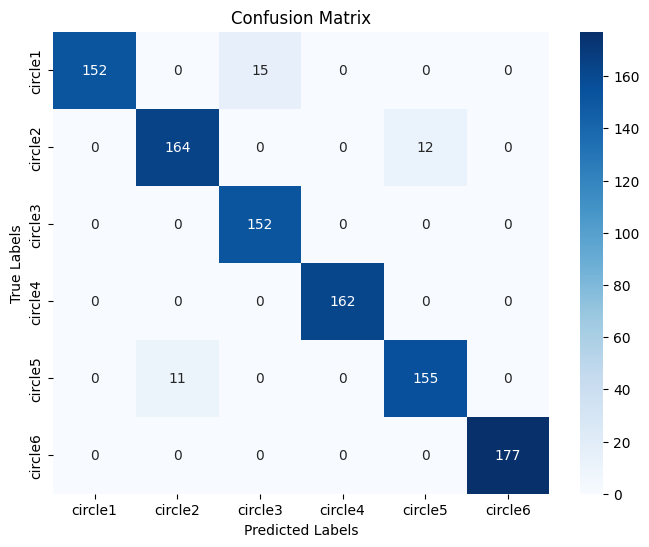

In [23]:
#confusion matric
cfm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from pathlib import Path

# 1. Create model save path
MODEL_NAME = "circles_multiclassANN.pth"
MODEL_SAVE_PATH = MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: circles_multiclassANN.pth
